# IPL_Voting : Hierarchical Clustering using Dendrogram

In [1]:
#Import neccessary libraries

import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

In [3]:
#Importing the data into pandas dataframe
ipl=pd.read_excel('C:/Users/saliynr/Downloads/IPL11_FINAL.xlsx')

In [6]:
#Analyze the dataframe
ipl.head()
#ipl.shape
#ipl.columns

,Match#,Date,Time (IST),Match,WINNER,Venue,Anand,Paris,Megha,Veni,...,Naveen.1,Raghu.1,Manasa.1,Anil.1,Sridhar.1,Sanjeeth.1,Anand P.1,Diwakar.1,Manish.1,Murali.1
0,1,Sat Apr 7,20:00:00,Mumbai Indians v Chennai Super Kings,CSK,Mumbai,CSK,CSK,CSK,CSK,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,2,Sun Apr 8,16:00:00,Kings XI Punjab v Delhi Daredevils,KXI,Mohali,KXI,KXI,DD,KXI,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
2,3,Sun Apr 8,20:00:00,Kolkata Knight Riders v Royal Challengers Bang...,KKR,Kolkata,RCB,RCB,RCB,KKR,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,4,Mon Apr 9,20:00:00,Sunrisers Hyderabad v Rajasthan Royals,SRH,Hyd,SRH,SRH,SRH,SRH,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
4,5,Tue Apr 10,20:00:00,Chennai Super Kings v Kolkata Knight Riders,CSK,Chennai,CSK,CSK,CSK,CSK,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0


In [ ]:
#Select only required columns
ipl1=ipl.loc[:,['Match#', 'Date', 'Time (IST)', 'Match', 'WINNER', 'Venue', 'Anand',
       'Paris', 'Megha', 'Veni', 'Priya', 'Ashok', 'G3R', 'Madhan', 'Raj',
       'Thimma', 'Surajit', 'Naveen', 'Raghu', 'Manasa', 'Anil', 'Sridhar',
       'Sanjeeth', 'Anand P', 'Diwakar', 'Manish', 'Murali']]

#Same can be achieved using iloc as shown below
#samp=ipl.iloc[:,:27]
#samp.tail(5)

In [46]:
ipl1.columns

Index(['Match#', 'Date', 'Time (IST)', 'Match', 'WINNER', 'Venue', 'Anand',
       'Paris', 'Megha', 'Veni', 'Priya', 'Ashok', 'G3R', 'Madhan', 'Raj',
       'Thimma', 'Surajit', 'Naveen', 'Raghu', 'Manasa', 'Anil', 'Sridhar',
       'Sanjeeth', 'Anand P', 'Diwakar', 'Manish', 'Murali'],
      dtype='object')

In [49]:
#Select required rows only

ipl1=ipl1.iloc[:60,:] # Final match was 60th which was played on 27th may 2018

In [50]:
ipl1.tail(5)

,Match#,Date,Time (IST),Match,WINNER,Venue,Anand,Paris,Megha,Veni,...,Naveen,Raghu,Manasa,Anil,Sridhar,Sanjeeth,Anand P,Diwakar,Manish,Murali
55,56,Sun May 20,20:00:00,Chennai Super Kings v Kings XI Punjab,CSK,Pune,CSK,CSK,KXI,CSK,...,CSK,CSK,CSK,CSK,CSK,CSK,KXI,KXI,CSK,CSK
56,Qual1,Tue May 22,19:00:00,Sunrisers Hyderabad v Chennai Super Kings,CSK,Mumbai,CSK,CSK,CSK,CSK,...,CSK,CSK,CSK,SRH,CSK,CSK,SRH,SRH,CSK,CSK
57,Elim,Wed May 23,19:00:00,Kolkata Knight Riders v Rajasthan Royals,KKR,Kolkata,KKR,KKR,KKR,KKR,...,KKR,RR,RR,KKR,KKR,KKR,KKR,RR,RR,KKR
58,Qual2,Fri May 25,19:00:00,Sunrisers Hyderabad v Kolkata Knight Riders,SRH,Kolkata,KKR,KKR,KKR,KKR,...,KKR,KKR,KKR,KKR,SRH,SRH,KKR,SRH,SRH,KKR
59,Final,Sun May 27,19:00:00,Chennai Super Kings v Sunrisers Hyderabad,CSK,Mumbai,SRH,SRH,CSK,SRH,...,CSK,SRH,SRH,CSK,CSK,CSK,SRH,SRH,CSK,CSK


In [16]:
#Create a dictionary tag a number to corresponding team

dict= {'RCB':1,'CSK':2,'MI':3,'SRH':4,'KKR':5,'DD':6,'RR':7,'KXI':8}

In [17]:
ipl2= ipl1.iloc[:,6:].replace(dict)

ipl2= ipl2.transpose()

In [22]:
ipl2.tail(5)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
Sanjeeth,3,8,5,4,2,7,4,1,3,5,...,1,2,1,5,3,2,2,5,4,2
Anand P,2,8,1,4,5,7,3,1,3,5,...,4,2,7,4,6,8,4,5,5,4
Diwakar,2,8,1,4,2,7,3,1,6,5,...,1,2,1,5,3,8,4,7,4,4
Manish,3,6,1,7,2,7,4,8,3,4,...,4,2,1,5,3,2,2,7,4,2
Murali,3,8,1,4,2,7,3,8,3,4,...,4,2,1,5,3,2,2,5,5,2


In [19]:
#Extract the names, to be used as labels 
names=list(ipl2.index.values)

names

['Anand',
 'Paris',
 'Megha',
 'Veni',
 'Priya',
 'Ashok',
 'G3R',
 'Madhan',
 'Raj',
 'Thimma',
 'Surajit',
 'Naveen',
 'Raghu',
 'Manasa',
 'Anil',
 'Sridhar',
 'Sanjeeth',
 'Anand P',
 'Diwakar',
 'Manish',
 'Murali']

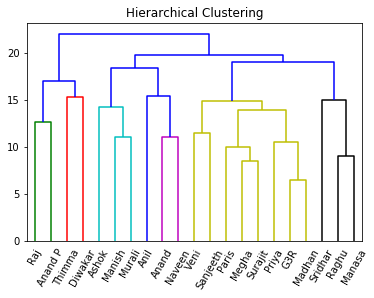

In [51]:
# Calculate the linkage: mergings
mergings = linkage(ipl2,method='complete')


# Plot the dendrogram, using names as labels
dendrogram(mergings,
           labels=names,
           leaf_rotation=60,
           leaf_font_size=10,
)
plt.title('Hierarchical Clustering')
plt.figure(figsize=(150, 30))
plt.show()